## Example 4 (Lions and wildebeest)

In [1]:
import tensorflow_probability as tfp
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### Suppose the number of lions observed at a camera trap in a given day follows a Poisson distribution with rate 1.

In [2]:
tfd = tfp.distributions
lions = tfd.Poisson(rate=1)

2023-07-22 17:10:24.516182: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 17:10:25.072410: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 562 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0001:00:00.0, compute capability: 7.5


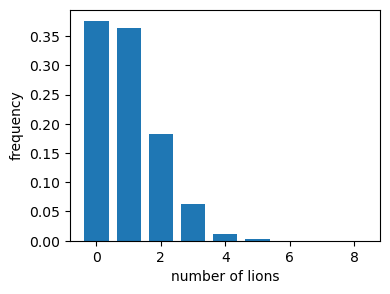

In [3]:
#We can now sample from this distribution to explore how the number of lions varies across different days.
# sample from the distribution for 10 years worth of samples
n_lions = lions.sample(3650)

# plot the histogram of number of lions each day
plt.figure(figsize=(4,3))
plt.hist(n_lions.numpy(), bins = np.arange(10),rwidth=0.75,density=True,align='left')
plt.xlabel('number of lions')
plt.ylabel('frequency')
plt.show()

The number of wildebeest present at the location also follows a Poisson distribution, however the number
of wildebeest that are observed on a given day depends on the number of lions that are also present

In [4]:
# we create a joint distribution where the output from the first distribution
# is passed to the second distribution using a lambda function
joint = tfd.JointDistributionSequential([tfd.Poisson(rate=1,name='n_lions'),
lambda n_lions : tfd.Poisson(rate=tf.math.exp(4-n_lions),name='n_wild')])


We can now sample from the joint distribution to see how we can expect the number of lions and wildebeest to vary jointly over different days.
we'll sample from the distribution to create 10 years worth of daily samples

In [5]:
samples = joint.sample(3650)
# we can see that samples is a list
print(type(samples))

Instructions for updating:
The `interpolate_nondiscrete` flag is deprecated; instead use `force_probs_to_zero_outside_support` (with the opposite sense).
<class 'list'>


In [6]:
# samples is a list of length 2, one entry for the samples of the number of lions
# and one for the number of wildebeest
print(len(samples))

2


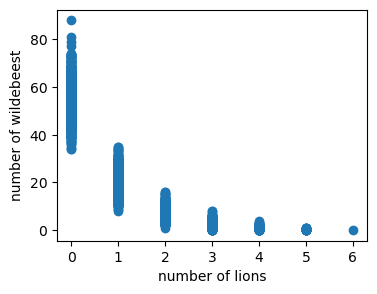

In [7]:
# next we'll plot the number of wildebeest against the number of lions on each day
plt.figure(figsize=(4,3))
plt.plot(samples[0],samples[1],'o')
plt.xlabel('number of lions')
plt.ylabel('number of wildebeest')
plt.show()

## Task 2.
Suppose you are an ice-cream seller. If it rains, you don’t sell any ice-creams.
If it doesn’t rain, the number of ice-creams you sell follows a Poisson distribution with a rate parameter
of 10.
The probability it rains on any given day is 0.25.
Create a joint sequential distribution that describes the number of ice-creams you will sell in a day.
Hint: You will have to use tf.cast(var_name, tf.float32) to convert any integer value, for example
the output from a Bernoulli distribution to a float value that can be used as the rate parameter for a
Poisson distribution.
Draw 1000 samples from the distribution and plot a histogram of the number of ice-creams sold in a day.
What is the probability of selling 15 ice-creams on a day when it doesn’t rain?

In [13]:
sold_icecreams_no_rain = tfd.Poisson(rate=10)

In [14]:
p_rain = 0.25
p_no_rain = 0.75

In [28]:
joint = tfd.JointDistributionSequential([
tfd.Bernoulli(probs=0.75,name='norain'),
lambda norain : tfd.Poisson(rate=10.0*(tf.cast(norain,tf.float32)),name='icecream')
])

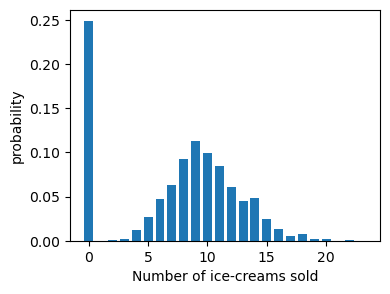

In [29]:
#Now we can sample from the distribution and plot the result
samples = joint.sample(1000)

plt.figure(figsize=(4,3))
plt.hist(samples[1].numpy(), bins = np.arange(25),rwidth=0.75,density=True,align='left')
plt.xlabel('Number of ice-creams sold')
plt.ylabel('probability')
plt.show()

In [21]:
print('Probability of selling 15 ice-creams is ', joint.prob([1,15]).numpy())

Probability of selling 15 ice-creams is  0.0086795045


In [31]:
len(samples)
#sample[0] no rain
#sample[1] selling icecream

2

In [35]:
print('Probability of rain on a day that does not rain', joint.prob([0,100]).numpy())

Probability of rain on a day that does not rain 0.0


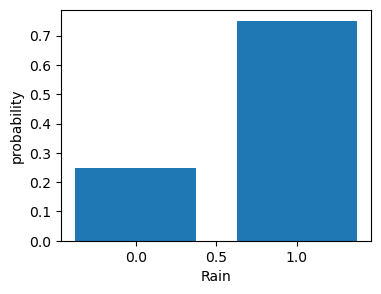

In [38]:
plt.figure(figsize=(4,3))
plt.hist(samples[0].numpy(), bins = np.arange(3),rwidth=0.75,density=True,align='left')
plt.xlabel('Rain')
plt.ylabel('probability')
plt.show()